1.1 Tölsd be megadott csv-ket egy-egy dataframe-be, és konvertáld az oszlopok neveit kisbetűssé!

In [1]:
import pandas as pd
matches1930_2018 = pd.read_csv('matches_1930_2018.csv')
matches2022 = pd.read_csv('matches_2022.csv')
schedule = pd.read_csv('matchs-schudule.csv')

matches1930_2018.columns = matches1930_2018.columns.str.lower()
matches2022.columns = matches2022.columns.str.lower()
schedule.columns = schedule.columns.str.lower()

1.2 Ellenőrizd, hogy 1930-2018 közötti és a 2022-es meccseket leíró állományok azonos oszlopokkal és adattípussal rendelkeznek-e, és ha igen, egyesítsd a két dataframe-et.

In [2]:
print(matches1930_2018.dtypes)
print(matches2022.dtypes)
matches = pd.concat([matches1930_2018, matches2022], axis=0)

home_team        object
away_team        object
home_score        int64
home_xg         float64
home_penalty    float64
away_score        int64
away_xg         float64
away_penalty    float64
home_manager     object
home_captain     object
away_manager     object
away_captain     object
home_goals       object
away_goals       object
attendance        int64
venue            object
officials        object
date             object
score            object
referee          object
notes            object
round            object
host             object
year              int64
dtype: object
home_team        object
away_team        object
home_score      float64
home_xg         float64
home_penalty    float64
away_score      float64
away_xg         float64
away_penalty    float64
home_manager     object
home_captain     object
away_manager     object
away_captain     object
home_goals       object
away_goals       object
attendance        int64
venue            object
officials        object
da

1.3 A betöltött állományok hány sorral és hány oszloppal rendelkeznek? Van valamilyen probléma a mérkőzésbeosztás táblázatával? Ha igen, korrigáld.

In [3]:
print(f'{matches.shape[0]} mérkőzés {matches.shape[1]} adattal')
print(f'{schedule.shape[0]} mérkőzésbeosztás {schedule.shape[1]} adattal')
print(schedule.head(1))
print('A mérkőzésbeosztás táblázata nem vesszővel határolt.')
#help(pd.read_csv)
schedule = pd.read_csv('matchs-schudule.csv', sep=';')
schedule.columns = schedule.columns.str.lower()
schedule.shape
print(f'{schedule.shape[0]} mérkőzésbeosztás {schedule.shape[1]} adattal')

956 mérkőzés 24 adattal
64 mérkőzésbeosztás 1 adattal
          match;date;country1;coutry2;phase
0  1;21/11/2022;Qatar;Ecuador;group matches
A mérkőzésbeosztás táblázata nem vesszővel határolt.
64 mérkőzésbeosztás 5 adattal


1.4 Az egyesített tábla milyen típusú indexekkel rendelkezik? 
Az index egyedi értékeket tartalmaz? Ha nem, korrigáld. Tipp: az index tulajdonság rendelkezik egy is_unique tulajdonsággal, amely erre felhasználható. A művelet után a dataframe oszlopainak száma egyezzen meg a művelet előttivel!

In [4]:
print(f'Az index típusa: {matches.index}')
if matches.index.is_unique:
    print('Az index egyedi értékeket tartalmaz')
else:
    print('Az index nem egyedi értékeket tartalmaz, az egyesítésből kifolyólag')
matches = matches.reset_index()
matches.index.is_unique
matches.drop(columns=['index'], inplace=True)
print(f'{matches.shape[0]} mérkőzés {matches.shape[1]} adattal')

Az index típusa: Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9,
            ...
            46, 47, 48, 49, 50, 51, 52, 53, 54, 55],
           dtype='int64', length=956)
Az index nem egyedi értékeket tartalmaz, az egyesítésből kifolyólag
956 mérkőzés 24 adattal


1.5 Nézzük meg milyen adatokat tartalmaznak a dataframe-ek: kérdezzük le az első és utolsó néhány sort, valamint a 10-19. sorokat többféleképpen.

In [5]:
display(matches.head())
display(matches.tail())

display(matches[10:20])
display(matches.loc[10:19])
display(matches.iloc[10:20])

display(schedule.head())
display(schedule.tail())

display(schedule[10:20])
display(schedule.loc[10:19])
display(schedule.iloc[10:20])

,home_team,away_team,home_score,home_xg,home_penalty,away_score,away_xg,away_penalty,home_manager,home_captain,...,attendance,venue,officials,date,score,referee,notes,round,host,year
0,France,Croatia,4.0,1.1,NaN,2.0,1.1,NaN,Didier Deschamps,Hugo Lloris,...,78011,"Olimpiyskiy stadion Luzhniki, Moskva",Néstor Pitana (Referee) · Hernán Maidana (AR1)...,2018-07-15,4–2,Néstor Pitana,NaN,Final,Russia,2018
1,Belgium,England,2.0,1.5,NaN,0.0,1.0,NaN,Roberto Martínez,Eden Hazard,...,64406,"Gazprom Arena, Sankt-Petersburg",Alireza Faghani (Referee) · Reza Sokhandan (AR...,2018-07-14,2–0,Alireza Faghani,NaN,Third-place match,Russia,2018
2,Croatia,England,2.0,1.7,NaN,1.0,0.6,NaN,Zlatko Dalić,Luka Modrić,...,78011,"Olimpiyskiy stadion Luzhniki, Moskva",Cüneyt Çakιr (Referee) · Bahattin Duran (AR1) ...,2018-07-11,2–1,Cüneyt Çakιr,Required Extra Time,Semi-finals,Russia,2018
3,France,Belgium,1.0,1.7,NaN,0.0,0.4,NaN,Didier Deschamps,Hugo Lloris,...,64286,"Gazprom Arena, Sankt-Petersburg",Andrés Cunha (Referee) · Nicolás Tarán (AR1) ·...,2018-07-10,1–0,Andrés Cunha,NaN,Semi-finals,Russia,2018
4,Sweden,England,0.0,0.5,NaN,2.0,1.0,NaN,Janne Andersson,Andreas Granqvist,...,39991,"Cosmos Arena, Samara",Björn Kuipers (Referee) · Sander van Roekel (A...,2018-07-07,0–2,Björn Kuipers,NaN,Quarter-finals,Russia,2018


,home_team,away_team,home_score,home_xg,home_penalty,away_score,away_xg,away_penalty,home_manager,home_captain,...,attendance,venue,officials,date,score,referee,notes,round,host,year
951,France,Poland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,NaN,NaN,2022-12-04,NaN,NaN,NaN,Round of 16,Qatar,2022
952,Brazil,Korea Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,NaN,NaN,2022-12-05,NaN,NaN,NaN,Round of 16,Qatar,2022
953,Japan,Croatia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,NaN,NaN,2022-12-05,NaN,NaN,NaN,Round of 16,Qatar,2022
954,Portugal,Switzerland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,NaN,NaN,2022-12-06,NaN,NaN,NaN,Round of 16,Qatar,2022
955,Morocco,Spain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,NaN,NaN,2022-12-06,NaN,NaN,NaN,Round of 16,Qatar,2022


,home_team,away_team,home_score,home_xg,home_penalty,away_score,away_xg,away_penalty,home_manager,home_captain,...,attendance,venue,officials,date,score,referee,notes,round,host,year
10,Brazil,Mexico,2.0,2.7,NaN,0.0,0.7,NaN,Tite,Thiago Silva,...,41970,"Cosmos Arena, Samara",Gianluca Rocchi (Referee) · Elenito Di Liberat...,2018-07-02,2–0,Gianluca Rocchi,NaN,Round of 16,Russia,2018
11,Belgium,Japan,3.0,2.5,NaN,2.0,0.7,NaN,Roberto Martínez,Eden Hazard,...,41466,"Rostov Arena, Rostov-na-Donu",Malang Diédhiou (Referee) · Djibril Camara (AR...,2018-07-02,3–2,Malang Diédhiou,NaN,Round of 16,Russia,2018
12,Spain,Russia,1.0,1.8,3.0,1.0,1.0,4.0,Fernando Hierro,Sergio Ramos,...,78011,"Olimpiyskiy stadion Luzhniki, Moskva",Björn Kuipers (Referee) · Sander van Roekel (A...,2018-07-01,(3) 1–1 (4),Björn Kuipers,Russia won on penalty kicks following extra time,Round of 16,Russia,2018
13,Croatia,Denmark,1.0,2.5,3.0,1.0,0.9,2.0,Zlatko Dalić,Luka Modrić,...,40851,"Stadion Nizhny Novgorod, Nizhny Novgorod",Néstor Pitana (Referee) · Hernán Maidana (AR1)...,2018-07-01,(3) 1–1 (2),Néstor Pitana,Croatia won on penalty kicks following extra time,Round of 16,Russia,2018
14,France,Argentina,4.0,2.2,NaN,3.0,0.8,NaN,Didier Deschamps,Hugo Lloris,...,42873,"Kazan Arena, Kazan",Alireza Faghani (Referee) · Reza Sokhandan (AR...,2018-06-30,4–3,Alireza Faghani,NaN,Round of 16,Russia,2018
15,Uruguay,Portugal,2.0,0.6,NaN,1.0,1.0,NaN,Óscar Tabárez,Diego Godín,...,44287,"Olimpiyskiy Stadion Fisht, Sochi",César Arturo Ramos (Referee) · Marvin Torrente...,2018-06-30,2–1,César Arturo Ramos,NaN,Round of 16,Russia,2018
16,Japan,Poland,0.0,0.7,NaN,1.0,1.4,NaN,Akira Nishino,Eiji Kawashima,...,42189,"Volgograd Arena, Volgograd",Janny Sikazwe (Referee) · Jerson dos Santos (A...,2018-06-28,0–1,Janny Sikazwe,NaN,Group stage,Russia,2018
17,Senegal,Colombia,0.0,0.5,NaN,1.0,0.3,NaN,Aliou Cissé,Cheikhou Kouyaté,...,41970,"Cosmos Arena, Samara",Milorad Mažić (Referee) · Milovan Ristić (AR1)...,2018-06-28,0–1,Milorad Mažić,NaN,Group stage,Russia,2018
18,England,Belgium,0.0,0.9,NaN,1.0,1.3,NaN,Gareth Southgate,Eric Dier,...,33973,"Kaliningrad Stadium, Kaliningrad",Damir Skomina (Referee) · Jure Praprotnik (AR1...,2018-06-28,0–1,Damir Skomina,NaN,Group stage,Russia,2018
19,Panama,Tunisia,1.0,0.6,NaN,2.0,2.1,NaN,Hernán Darío Gómez,Román Torres,...,37168,"Mordovia Arena, Saransk",Nawaf Shukralla (Referee) · Yaser Tulefat (AR1...,2018-06-28,1–2,Nawaf Shukralla,NaN,Group stage,Russia,2018


,home_team,away_team,home_score,home_xg,home_penalty,away_score,away_xg,away_penalty,home_manager,home_captain,...,attendance,venue,officials,date,score,referee,notes,round,host,year
10,Brazil,Mexico,2.0,2.7,NaN,0.0,0.7,NaN,Tite,Thiago Silva,...,41970,"Cosmos Arena, Samara",Gianluca Rocchi (Referee) · Elenito Di Liberat...,2018-07-02,2–0,Gianluca Rocchi,NaN,Round of 16,Russia,2018
11,Belgium,Japan,3.0,2.5,NaN,2.0,0.7,NaN,Roberto Martínez,Eden Hazard,...,41466,"Rostov Arena, Rostov-na-Donu",Malang Diédhiou (Referee) · Djibril Camara (AR...,2018-07-02,3–2,Malang Diédhiou,NaN,Round of 16,Russia,2018
12,Spain,Russia,1.0,1.8,3.0,1.0,1.0,4.0,Fernando Hierro,Sergio Ramos,...,78011,"Olimpiyskiy stadion Luzhniki, Moskva",Björn Kuipers (Referee) · Sander van Roekel (A...,2018-07-01,(3) 1–1 (4),Björn Kuipers,Russia won on penalty kicks following extra time,Round of 16,Russia,2018
13,Croatia,Denmark,1.0,2.5,3.0,1.0,0.9,2.0,Zlatko Dalić,Luka Modrić,...,40851,"Stadion Nizhny Novgorod, Nizhny Novgorod",Néstor Pitana (Referee) · Hernán Maidana (AR1)...,2018-07-01,(3) 1–1 (2),Néstor Pitana,Croatia won on penalty kicks following extra time,Round of 16,Russia,2018
14,France,Argentina,4.0,2.2,NaN,3.0,0.8,NaN,Didier Deschamps,Hugo Lloris,...,42873,"Kazan Arena, Kazan",Alireza Faghani (Referee) · Reza Sokhandan (AR...,2018-06-30,4–3,Alireza Faghani,NaN,Round of 16,Russia,2018
15,Uruguay,Portugal,2.0,0.6,NaN,1.0,1.0,NaN,Óscar Tabárez,Diego Godín,...,44287,"Olimpiyskiy Stadion Fisht, Sochi",César Arturo Ramos (Referee) · Marvin Torrente...,2018-06-30,2–1,César Arturo Ramos,NaN,Round of 16,Russia,2018
16,Japan,Poland,0.0,0.7,NaN,1.0,1.4,NaN,Akira Nishino,Eiji Kawashima,...,42189,"Volgograd Arena, Volgograd",Janny Sikazwe (Referee) · Jerson dos Santos (A...,2018-06-28,0–1,Janny Sikazwe,NaN,Group stage,Russia,2018
17,Senegal,Colombia,0.0,0.5,NaN,1.0,0.3,NaN,Aliou Cissé,Cheikhou Kouyaté,...,41970,"Cosmos Arena, Samara",Milorad Mažić (Referee) · Milovan Ristić (AR1)...,2018-06-28,0–1,Milorad Mažić,NaN,Group stage,Russia,2018
18,England,Belgium,0.0,0.9,NaN,1.0,1.3,NaN,Gareth Southgate,Eric Dier,...,33973,"Kaliningrad Stadium, Kaliningrad",Damir Skomina (Referee) · Jure Praprotnik (AR1...,2018-06-28,0–1,Damir Skomina,NaN,Group stage,Russia,2018
19,Panama,Tunisia,1.0,0.6,NaN,2.0,2.1,NaN,Hernán Darío Gómez,Román Torres,...,37168,"Mordovia Arena, Saransk",Nawaf Shukralla (Referee) · Yaser Tulefat (AR1...,2018-06-28,1–2,Nawaf Shukralla,NaN,Group stage,Russia,2018


,home_team,away_team,home_score,home_xg,home_penalty,away_score,away_xg,away_penalty,home_manager,home_captain,...,attendance,venue,officials,date,score,referee,notes,round,host,year
10,Brazil,Mexico,2.0,2.7,NaN,0.0,0.7,NaN,Tite,Thiago Silva,...,41970,"Cosmos Arena, Samara",Gianluca Rocchi (Referee) · Elenito Di Liberat...,2018-07-02,2–0,Gianluca Rocchi,NaN,Round of 16,Russia,2018
11,Belgium,Japan,3.0,2.5,NaN,2.0,0.7,NaN,Roberto Martínez,Eden Hazard,...,41466,"Rostov Arena, Rostov-na-Donu",Malang Diédhiou (Referee) · Djibril Camara (AR...,2018-07-02,3–2,Malang Diédhiou,NaN,Round of 16,Russia,2018
12,Spain,Russia,1.0,1.8,3.0,1.0,1.0,4.0,Fernando Hierro,Sergio Ramos,...,78011,"Olimpiyskiy stadion Luzhniki, Moskva",Björn Kuipers (Referee) · Sander van Roekel (A...,2018-07-01,(3) 1–1 (4),Björn Kuipers,Russia won on penalty kicks following extra time,Round of 16,Russia,2018
13,Croatia,Denmark,1.0,2.5,3.0,1.0,0.9,2.0,Zlatko Dalić,Luka Modrić,...,40851,"Stadion Nizhny Novgorod, Nizhny Novgorod",Néstor Pitana (Referee) · Hernán Maidana (AR1)...,2018-07-01,(3) 1–1 (2),Néstor Pitana,Croatia won on penalty kicks following extra time,Round of 16,Russia,2018
14,France,Argentina,4.0,2.2,NaN,3.0,0.8,NaN,Didier Deschamps,Hugo Lloris,...,42873,"Kazan Arena, Kazan",Alireza Faghani (Referee) · Reza Sokhandan (AR...,2018-06-30,4–3,Alireza Faghani,NaN,Round of 16,Russia,2018
15,Uruguay,Portugal,2.0,0.6,NaN,1.0,1.0,NaN,Óscar Tabárez,Diego Godín,...,44287,"Olimpiyskiy Stadion Fisht, Sochi",César Arturo Ramos (Referee) · Marvin Torrente...,2018-06-30,2–1,César Arturo Ramos,NaN,Round of 16,Russia,2018
16,Japan,Poland,0.0,0.7,NaN,1.0,1.4,NaN,Akira Nishino,Eiji Kawashima,...,42189,"Volgograd Arena, Volgograd",Janny Sikazwe (Referee) · Jerson dos Santos (A...,2018-06-28,0–1,Janny Sikazwe,NaN,Group stage,Russia,2018
17,Senegal,Colombia,0.0,0.5,NaN,1.0,0.3,NaN,Aliou Cissé,Cheikhou Kouyaté,...,41970,"Cosmos Arena, Samara",Milorad Mažić (Referee) · Milovan Ristić (AR1)...,2018-06-28,0–1,Milorad Mažić,NaN,Group stage,Russia,2018
18,England,Belgium,0.0,0.9,NaN,1.0,1.3,NaN,Gareth Southgate,Eric Dier,...,33973,"Kaliningrad Stadium, Kaliningrad",Damir Skomina (Referee) · Jure Praprotnik (AR1...,2018-06-28,0–1,Damir Skomina,NaN,Group stage,Russia,2018
19,Panama,Tunisia,1.0,0.6,NaN,2.0,2.1,NaN,Hernán Darío Gómez,Román Torres,...,37168,"Mordovia Arena, Saransk",Nawaf Shukralla (Referee) · Yaser Tulefat (AR1...,2018-06-28,1–2,Nawaf Shukralla,NaN,Group stage,Russia,2018


,match,date,country1,coutry2,phase
0,1,21/11/2022,Qatar,Ecuador,group matches
1,2,21/11/2022,Senegal,Netherlands,group matches
2,3,21/11/2022,England,Iran,group matches
3,4,21/11/2022,USA,Wales,group matches
4,5,22/11/2022,France,Australia,group matches


,match,date,country1,coutry2,phase
59,60,10/12/2022,W55,W56,quarter-finals
60,61,13/12/2022,W57,W58,semi-finals
61,62,14/12/2022,W59,W60,semi-finals
62,63,17/12/2022,L61,L62,third place
63,64,18/12/2022,W61,W62,final


,match,date,country1,coutry2,phase
10,11,23/11/2022,Germany,Japan,group matches
11,12,23/11/2022,Morocco,Croatia,group matches
12,13,24/11/2022,Switzerland,Cameroon,group matches
13,14,24/11/2022,Uruguay,South Korea,group matches
14,15,24/11/2022,Portugal,Ghana,group matches
15,16,24/11/2022,Brazil,Serbia,group matches
16,17,25/11/2022,Wales,Iran,group matches
17,18,25/11/2022,Qatar,Senegal,group matches
18,19,25/11/2022,Netherlands,Ecuador,group matches
19,20,25/11/2022,England,USA,group matches


,match,date,country1,coutry2,phase
10,11,23/11/2022,Germany,Japan,group matches
11,12,23/11/2022,Morocco,Croatia,group matches
12,13,24/11/2022,Switzerland,Cameroon,group matches
13,14,24/11/2022,Uruguay,South Korea,group matches
14,15,24/11/2022,Portugal,Ghana,group matches
15,16,24/11/2022,Brazil,Serbia,group matches
16,17,25/11/2022,Wales,Iran,group matches
17,18,25/11/2022,Qatar,Senegal,group matches
18,19,25/11/2022,Netherlands,Ecuador,group matches
19,20,25/11/2022,England,USA,group matches


,match,date,country1,coutry2,phase
10,11,23/11/2022,Germany,Japan,group matches
11,12,23/11/2022,Morocco,Croatia,group matches
12,13,24/11/2022,Switzerland,Cameroon,group matches
13,14,24/11/2022,Uruguay,South Korea,group matches
14,15,24/11/2022,Portugal,Ghana,group matches
15,16,24/11/2022,Brazil,Serbia,group matches
16,17,25/11/2022,Wales,Iran,group matches
17,18,25/11/2022,Qatar,Senegal,group matches
18,19,25/11/2022,Netherlands,Ecuador,group matches
19,20,25/11/2022,England,USA,group matches


2.1 Vizsgáljuk meg mindkét dataframe-et olyan szempontból, hogy mely oszlopok tartalmaznak nullértékeket.

In [6]:
display(matches.isnull().sum())
display(schedule.isnull().sum())

home_team         0
away_team         0
home_score        8
home_xg         844
home_penalty    926
away_score        8
away_xg         844
away_penalty    926
home_manager      8
home_captain    328
away_manager      8
away_captain    328
home_goals      185
away_goals      309
attendance        0
venue             8
officials       263
date              0
score             8
referee         263
notes           888
round             0
host              0
year              0
dtype: int64

match       0
date        0
country1    0
coutry2     0
phase       0
dtype: int64

2.2 Dobjuk el a home_xg és az away_xg oszlopokat a mérkőzéseket tartalmazó dataframe-ből: az eXpected Goals érték csak igen kevés mérkőzés esetében áll rendelkezésre.

In [7]:
matches.drop(columns=['home_xg', 'away_xg'], inplace=True)

2.3 Vizsgáljuk meg a mérkőzéseket tartalmazó dataframe utolsó 20 sorát. Mit állapíthatunk meg? Csak azokat a sorokat tartsuk meg, amelyek tartalmaznak tényleges eredményadatot.

In [8]:
display(matches.tail(10))
n = matches[matches['home_score'].isna()==True].shape[0]
print(f'{n} mérkőzés esetében nincs eredmény')
matches = matches[matches['home_score'].isna()==False]

,home_team,away_team,home_score,home_penalty,away_score,away_penalty,home_manager,home_captain,away_manager,away_captain,...,attendance,venue,officials,date,score,referee,notes,round,host,year
946,Ghana,Uruguay,0.0,NaN,2.0,NaN,Otto Addo,André Ayew,Diego Alonso,Luis Suárez,...,43443,"Al Janoub Stadium, Al Wakrah",Daniel Siebert (Referee) · Jan Seidel (AR1) · ...,2022-12-02,0–2,Daniel Siebert,NaN,Group stage,Qatar,2022
947,Korea Republic,Portugal,2.0,NaN,1.0,NaN,Sérgio Costa,Son Heung-min,Fernando Santos,Cristiano Ronaldo,...,0,"Education City Stadium, Doha",Facundo Tello (Referee) · Ezequiel Brailovsky ...,2022-12-02,2–1,Facundo Tello,NaN,Group stage,Qatar,2022
948,Argentina,Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,NaN,NaN,2022-12-03,NaN,NaN,NaN,Round of 16,Qatar,2022
949,Netherlands,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,NaN,NaN,2022-12-03,NaN,NaN,NaN,Round of 16,Qatar,2022
950,England,Senegal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,NaN,NaN,2022-12-04,NaN,NaN,NaN,Round of 16,Qatar,2022
951,France,Poland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,NaN,NaN,2022-12-04,NaN,NaN,NaN,Round of 16,Qatar,2022
952,Brazil,Korea Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,NaN,NaN,2022-12-05,NaN,NaN,NaN,Round of 16,Qatar,2022
953,Japan,Croatia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,NaN,NaN,2022-12-05,NaN,NaN,NaN,Round of 16,Qatar,2022
954,Portugal,Switzerland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,NaN,NaN,2022-12-06,NaN,NaN,NaN,Round of 16,Qatar,2022
955,Morocco,Spain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,NaN,NaN,2022-12-06,NaN,NaN,NaN,Round of 16,Qatar,2022


8 mérkőzés esetében nincs eredmény


2.4 A maradék oszlopok közül a karakterláncot tartalmazók esetében a null értékeket helyettesítsük üres karakterlánccal.

In [9]:
matches['home_captain']=matches['home_captain'].fillna('')
matches['away_captain']=matches['away_captain'].fillna('')
matches['officials']=matches['officials'].fillna('')
matches['referee']=matches['referee'].fillna('')
matches['notes']=matches['notes'].fillna('')

2.5 Kérdezzük le, hogy van-e olyan eset, amikor a home_goals/away_goals értéke null, de a megfelelő pontszám (home_score, away_score) értéke nem 0. Az olyan soroknál, amelyeknél a home_goals/away_goals null, és a megfelelő score 0, helyettesítsük be null értéket az oszlop típusához illő üres értékkel.

In [10]:
n1 = matches[((matches['home_goals'].isna()) & (matches['home_score']!=0))].shape[0]
n2 = matches[((matches['away_goals'].isna()) & (matches['away_score']!=0))].shape[0]
if n1==0 & n2==0:
    print('Nincs ilyen eset')
else:
    print(f'{n1} illetve {n2} esetben előfordul.')
#matches['home_goals'].dtype
#matches['away_goals'].dtype
matches['home_goals']=matches['home_goals'].fillna('')
matches['away_goals']=matches['away_goals'].fillna('')

Nincs ilyen eset


2.6 Szintén helyettesítsük be a megfelelő adattípusú értékkel a home_penalty és az away_penalty oszlopok null értékeit. Ezt követően újból ellenőrizzük a null értékek jelenlétét. Ha mindent jól csináltunk, a mérkőzéseket tartalmató dataframe 948 sort és 22 oszlopot tartalmaz.

In [11]:
matches['home_penalty']=matches['home_penalty'].fillna(0)
matches['away_penalty']=matches['away_penalty'].fillna(0)
display(matches.isnull().sum())
display(matches.shape)

home_team       0
away_team       0
home_score      0
home_penalty    0
away_score      0
away_penalty    0
home_manager    0
home_captain    0
away_manager    0
away_captain    0
home_goals      0
away_goals      0
attendance      0
venue           0
officials       0
date            0
score           0
referee         0
notes           0
round           0
host            0
year            0
dtype: int64

(948, 22)

2.7 Irasd ki a numerikus oszlopok közötti korrelációt. Melyik két oszlop között található erős korreláció?

In [12]:
display(matches.corr())
#tipp: matches.corr().style.background_gradient(cmap='coolwarm')
print('home_penalty és away penalty oszlopok között található erős korreláció')

,home_score,home_penalty,away_score,away_penalty,attendance,year
home_score,1.000000,-0.093121,0.004433,-0.099562,-0.105546,-0.355067
home_penalty,-0.093121,1.000000,-0.024670,0.892202,0.081084,0.088969
away_score,0.004433,-0.024670,1.000000,-0.032466,-0.039334,0.082842
away_penalty,-0.099562,0.892202,-0.032466,1.000000,0.084479,0.090724
attendance,-0.105546,0.081084,-0.039334,0.084479,1.000000,0.287393
year,-0.355067,0.088969,0.082842,0.090724,0.287393,1.000000


home_penalty és away penalty oszlopok között található erős korreláció


3.1 Képezzünk egy új dataframe-et amely a csapatot, az ellenfelet és a rúgott gólokat fogja tartalmazni. Ehhez vegyük először a year, home_team, a home_goals és az away_goals oszlopokat egy új dataframe-ként, majd tegyük ugyanezt a másik adatforrásunkból a year, round, away_team, az away_goals és a home_goals oszlopokkal. Végül egyesítsük a két dataframe-et úgy, hogy az eredménynek öt oszlopa legyen: year, round, team, opponent és goals.

In [13]:
homegoals = matches[['year', 'round', 'home_team', 'away_team', 'home_goals']]
awaygoals=matches[['year', 'round', 'away_team', 'home_team', 'away_goals']]
homegoals=homegoals.rename(columns={'home_team': 'team', 'away_team':'opponent', 'home_goals':'goals'})
awaygoals=awaygoals.rename(columns={'away_team': 'team', 'home_team':'opponent', 'away_goals':'goals'})
goals=awaygoals.append(homegoals)
display(goals)

<ipython-input-13-130fff1b4a8e>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  goals=awaygoals.append(homegoals)


,year,round,team,opponent,goals
0,2018,Final,Croatia,France,Ivan Perišić · 28|Mario Mandžukić · 69
1,2018,Third-place match,England,Belgium,
2,2018,Semi-finals,England,Croatia,Kieran Trippier · 5
3,2018,Semi-finals,Belgium,France,
4,2018,Quarter-finals,England,Sweden,Harry Maguire · 30|Dele Alli · 59
...,...,...,...,...,...
943,2022,Group stage,Japan,Spain,Ritsu Doan · 48|Ao Tanaka · 51
944,2022,Group stage,Cameroon,Brazil,Vincent Aboubakar · 90+2|Vincent Aboubakar · 90+3
945,2022,Group stage,Serbia,Switzerland,Aleksandar Mitrović · 26|Dušan Vlahović · 35
946,2022,Group stage,Ghana,Uruguay,


3.2 Az előző művelet eredményeképpen az index oszlop duplkált értékeket tartalmaz. Képezzünk az új dataframe részére egy új indexet, úgy, hogy a régit is megtartjuk.

In [14]:
goals=goals.reset_index()

3.3 A goals oszlop jelenleg ömlesztve tartalmazza a két csapat részéről szerzett gólokat "|" határolókarakterrel. Hozzunk létre egy új dataframe-et, amely a rúgott gólokat soronként tartalmazza. Először nem baj, ha a formátum "1 Eden Hazard · 82" formájú, a későbbi lépésekben fogjuk ezt a problémát kezelni. A kívánatos végeredmény a következő. Tipp: split használata.

In [15]:
goals['goals'] = goals['goals'].str.split('|')
goals = goals.explode('goals')
display(goals.head(2))

,index,year,round,team,opponent,goals
0,0,2018,Final,Croatia,France,Ivan Perišić · 28
0,0,2018,Final,Croatia,France,Mario Mandžukić · 69


3.4 Új dataframe-ünk egyelőre egy oszlopban tartalmazza a labdarúgó nevét és a gól időpontját. Bontsuk ezt fel két oszlopra és nevezzük el az oszlopokat értelmeszerűen!

In [16]:
goals= pd.concat([goals, goals['goals'].str.split(" · ", expand=True)], axis=1)
display(goals)
goals.rename(columns={0: 'player', 1:'minute'}, inplace=True)
display(goals)

,index,year,round,team,opponent,goals,0,1
0,0,2018,Final,Croatia,France,Ivan Perišić · 28,Ivan Perišić,28
0,0,2018,Final,Croatia,France,Mario Mandžukić · 69,Mario Mandžukić,69
1,1,2018,Third-place match,England,Belgium,,,None
2,2,2018,Semi-finals,England,Croatia,Kieran Trippier · 5,Kieran Trippier,5
3,3,2018,Semi-finals,Belgium,France,,,None
...,...,...,...,...,...,...,...,...
1893,945,2022,Group stage,Serbia,Switzerland,Aleksandar Mitrović · 26,Aleksandar Mitrović,26
1893,945,2022,Group stage,Serbia,Switzerland,Dušan Vlahović · 35,Dušan Vlahović,35
1894,946,2022,Group stage,Ghana,Uruguay,,,None
1895,947,2022,Group stage,Korea Republic,Portugal,Kim Young-gwon · 27,Kim Young-gwon,27


,index,year,round,team,opponent,goals,player,minute
0,0,2018,Final,Croatia,France,Ivan Perišić · 28,Ivan Perišić,28
0,0,2018,Final,Croatia,France,Mario Mandžukić · 69,Mario Mandžukić,69
1,1,2018,Third-place match,England,Belgium,,,None
2,2,2018,Semi-finals,England,Croatia,Kieran Trippier · 5,Kieran Trippier,5
3,3,2018,Semi-finals,Belgium,France,,,None
...,...,...,...,...,...,...,...,...
1893,945,2022,Group stage,Serbia,Switzerland,Aleksandar Mitrović · 26,Aleksandar Mitrović,26
1893,945,2022,Group stage,Serbia,Switzerland,Dušan Vlahović · 35,Dušan Vlahović,35
1894,946,2022,Group stage,Ghana,Uruguay,,,None
1895,947,2022,Group stage,Korea Republic,Portugal,Kim Young-gwon · 27,Kim Young-gwon,27


3.5 A gól időpontját tartalmazó oszlop jelenleg tartalmazza a hosszabbításban lőtt gólok esetében az extra játékidő perceit. Készítsünk egy egyszerű függvényt, ami képes a kapott karakterláncot pluszjel mentén kettévágni, majd a két részt összeadni. A függvény kezelje, ha null értéket kap, ebben az esetben adjon vissza nullt, illetve azt is, ha nem összeget kap. Apply segítségével alkalmazzuk ezt a perceket tartalmazó oszlopra és az eredményt tároljuk.

In [17]:
def stringadd(x):
    if x is None:
        return None
    temp = x.split('+')
    if len(temp)==1:
        return int(x)
    a = int(x.split('+')[0])
    b = int(x.split('+')[1])
    return a+b

goals['minute']=goals['minute'].apply(stringadd)
goals['minute']=pd.to_numeric(goals['minute'])

3.6 Konvertáljuk a függvényünk segítségével immár kizárólag számokat és null értékeket tartalmazó oszlopot számmá.

In [18]:
goals['minute']=pd.to_numeric(goals['minute'])

3.7 Képezzünk két új logikai oszlopot, amelyekben az öngól és a büntetőgól tényét tároljuk. Ezek jelölése (OG) illetve (P).

In [19]:
goals['owngoal']=goals['player'].str.contains('(OG)', regex=False)
goals['penalty']=goals['player'].str.contains('(P)', regex=False)

3.8 A plotly_express gapminder csomagját használva képezzünk egy continent oszlopot is a rúgott gólok mellé. Hány ország esetében nem találtunk megfelelő kontinenst, és ezek hány meccset érintenek? Pótoljuk a hiányzó országokat az alábbi fájl segítségével: [missingcountries.csv](missingcountries.csv). Gondoskodjunk arról, hogy a végén csak egyetlen "continent" oszlop maradjon

In [20]:
import plotly_express as px
countries = px.data.gapminder()
countries=countries[['country', 'continent']].drop_duplicates().rename(columns={'country': 'team'})
goals=pd.merge(goals, countries, on='team', how='left')
goals[goals['continent'].isna()]['team'].unique()
goals[goals['continent'].isna()].groupby(['team'])['index'].count()
missingcountries = pd.read_csv('missingcountries.csv', header=None, names=['team', 'continent'])
goals=pd.merge(goals, missingcountries, on='team', how='left')
import numpy as np
goals['continent'] = np.where(goals['continent_x'].isna(), goals['continent_y'], goals['continent_x'])
goals.drop(columns=['continent_x', 'continent_y'], inplace=True)

4.1 Melyik öt labdarúgó lőtte a legtöbb gólt a VB-k történetében az adatkészlet szerint?

In [21]:
goals["ID"] = goals.index  ##számításokhoz
goals.loc[goals["player"] != ""].groupby(['player'])['ID'].count().sort_values(ascending=False).head(5)

player
Miroslav Klose    17
Ronaldo           14
Just Fontaine     13
Gerd Müller       13
Pelé              12
Name: ID, dtype: int64

4.2 Melyik európai nemzeti válogatott lőtte a legtöbb büntetőt?

In [22]:
goals.loc[((goals['continent']=='Europe')&(goals['penalty']==True))].groupby(['team'])['ID'].count().sort_values(ascending=False).head(1)

team
Spain    16
Name: ID, dtype: int64

4.3 Ábrázold oszlopdiagramon, hogy az egyesek kontinensek összesen hány gólt szereztek a vb-k történetében!

<BarContainer object of 5 artists>

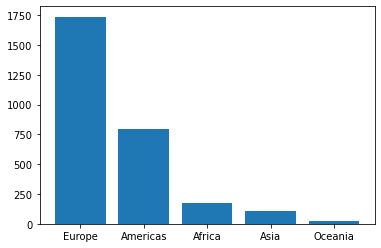

In [23]:
import matplotlib.pyplot as plt
goalsbycontinent = goals.loc[goals["goals"] != ""].groupby(['continent'])['ID'].count().sort_values(ascending=False).head(5).reset_index()
plt.bar(goalsbycontinent['continent'], goalsbycontinent['ID'])

 4.4 Ábrázold vonaldiagramon évről-évre a büntetők és az öngólok alakulását! Az ábrának legyen címe és jelmagyarázata is.

Text(0.5, 1.0, 'Büntetők és öngólok')

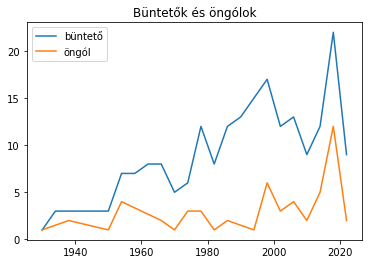

In [24]:
pperyear = goals.loc[(goals["penalty"] == True)].groupby(['year'])['ID'].count()
operyear = goals.loc[(goals["owngoal"] == True)].groupby(['year'])['ID'].count()
plt.plot(pperyear.index, pperyear.values, label='büntető')
plt.plot(operyear.index, operyear.values, label='öngól')
plt.legend()
plt.title('Büntetők és öngólok')

4.5 Készíts egy három subplotból álló ábrát. A diagramterület két soros, két oszlopos legyen, a bal felső cellában az öngólök, a jobb felső cellában a büntetők, az alsó bal és jobb cella egyesítve minden gólt tartalmazzon hisztogramon. Minden ábrának legyen címe és tengelyfelirata.

Text(0.5, 1.0, 'Gólok')

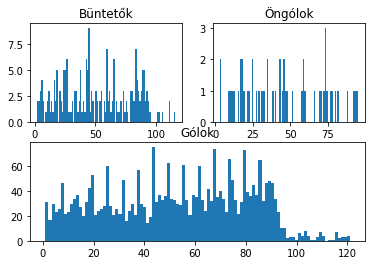

In [25]:
plt.subplot(2, 2, 1)
plt.hist(goals.loc[goals['penalty']==True]['minute'], 100)
plt.title('Büntetők')
plt.subplot(2, 2, 2)
plt.hist(goals.loc[goals['owngoal']==True]['minute'], 100)
plt.title('Öngólok')
plt.subplot(2, 1, 2)
plt.hist(goals['minute'], 100)
plt.title('Gólok')

5.1. Képezz egy új dataframe-et a gólok alapján: tartalmazza az évet, játékos nevét, a percet,  büntető és öngólt jelölő oszlopokat. Csak azok a sorok kerüljenek be, amelyek ténylegesen rúgott gólokat tartalmaznak.

In [40]:
playergoals = goals[['year', 'player', 'minute', 'penalty', 'owngoal']]
playergoals = playergoals.loc[playergoals['player']!='']

5.2. Képezzünk egy harmadik logikai típusú oszlopot, amelynek akkor igaz az értéke, ha sem nem öngól, sem nem büntető az adott gól.

In [41]:
playergoals['normal'] = ((playergoals['penalty']==False) & (playergoals['owngoal']==False))

5.3 Az előállt háromoszlopos táblát alakítsuk át úgy, hogy a következő oszlopokat tartalmazza: Év, Játékos, Góltípus, Perc


In [42]:
playergoals = pd.melt(playergoals, id_vars=['year', 'player', 'minute'], var_name='typeofgoal')
playergoals = playergoals.loc[playergoals['value']==True]
display(playergoals)

,year,player,minute,typeofgoal,value
12,2018,Harry Kane (P),57.0,penalty,True
15,2018,Artem Dzyuba (P),42.0,penalty,True
27,2018,Andreas Granqvist (P),62.0,penalty,True
52,2018,Carlos Vela (P),26.0,penalty,True
57,2018,Mile Jedinak (P),38.0,penalty,True
...,...,...,...,...,...
8509,2022,Vincent Aboubakar,93.0,normal,True
8510,2022,Aleksandar Mitrović,26.0,normal,True
8511,2022,Dušan Vlahović,35.0,normal,True
8512,2022,Kim Young-gwon,27.0,normal,True
